**A**

In this Section, you implement the **local Metropolis algorithm**, and compare its output with an exactly known result. In **real applications, this validation run** would last many days, and you would try to establish agreement with the exact result to 5 or 6 significant digits.

**A1**

Download (cut-and-paste) the **local Metropolis algorithm** for the Ising model, as shown below.



In [1]:
import random, math

def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

L = 6
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}

T = 2.0
S = [random.choice([1, -1]) for k in range(N)]
nsteps = N * 100
beta = 1.0 / T
Energy = energy(S, N, nbr)
E = []
for step in range(nsteps):
    k = random.randint(0, N - 1)
    delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S[k] *= -1
        Energy += delta_E
    E.append(Energy)
print('mean energy per spin:', sum(E) / float(len(E) * N))

mean energy per spin: -1.6240432098765432


- Run the local Metropolis algorithm for L=6 and T=2.0 (greatly increase the number of iterations nsteps). Check that you recover the exact value of the average energy per spin: E/N =-1.7473... (known from exact enumeration). To do so, communicate the results obtained in four independent runs of the algorithms (no calculation of error bars required). Indicate your value of nsteps.

In [3]:
import random, math

def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

L = 6
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}

T = 2.0
S = [random.choice([1, -1]) for k in range(N)]
nsteps = N * 100000
beta = 1.0 / T
Energy = energy(S, N, nbr)
E = []
for step in range(nsteps):
    k = random.randint(0, N - 1)
    delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S[k] *= -1
        Energy += delta_E
    E.append(Energy)
print('mean energy per spin:', sum(E) / float(len(E) * N))

mean energy per spin: -1.7479232407407408


Run# 1, E/N = -1.7497 <br>
Run# 2, E/N = -1.7479 <br>
Run# 3, E/N = -1.7365 <br>
Run# 4, E/N = -1.7460 <br>
Run# 5, E/N = -1.7472<br> 

**A2**

Modify the program of Section A1, by adding the two following features:

- reading in the initial configuration from a file (if possible),

- writing out the final configuration on a file,

- showing a plot of the final configuration.

Here are three snippets for reading, storing, and plotting a configuration.

mean energy per spin: -0.8166982313096524
Starting from file data_local_128_3.0.txt


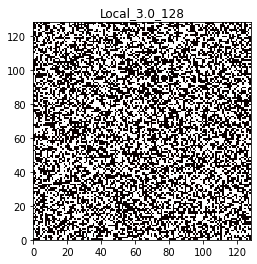

In [4]:
import random, math,os
import pylab

def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

L = 128
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}

T = 3.0
S = [random.choice([1, -1]) for k in range(N)]
nsteps = N * 4000
beta = 1.0 / T
Energy = energy(S, N, nbr)
E = []
for step in range(nsteps):
    k = random.randint(0, N - 1)
    delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S[k] *= -1
        Energy += delta_E
    E.append(Energy)
print('mean energy per spin:', sum(E) / float(len(E) * N))

def x_y(k, L):
    y = k // L
    x = k - y * L
    return x, y

conf = [[0 for x in range(L)] for y in range(L)]
for k in range(N):
    x, y = x_y(k, L)
    conf[x][y] = S[k]
    
filename = 'data_local_'+ str(L) + '_' + str(T) + '.txt'

if os.path.isfile(filename):
    f = open(filename, 'r')
    S = []
    for line in f:
        S.append(int(line))
    f.close()
    print ('Starting from file', filename)
else:
    S = [random.choice([1, -1]) for k in range(N)]
    print('Starting from a random configuration')
    
f = open(filename, 'w')
for a in S:
    f.write(str(a) + '\n')
f.close()

pylab.imshow(conf, extent=[0, L, 0, L], interpolation='nearest')
pylab.set_cmap('hot')
pylab.title('Local_'+ str(T) + '_' + str(L))
pylab.savefig('plot_A2_local_'+ str(T) + '_' + str(L)+ '.png')
pylab.show()

**A2 (continued)**

Repeat the same as in the previous point, with several runs at the critical temperature **T_crit = 2.27** (probably you should run your code for at least a few minutes). **Upload one plot** of a typical configuration.

mean energy per spin: -1.3833336669936775
Starting from file data_local_128_2.27.txt


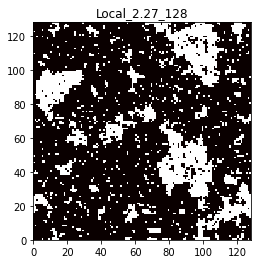

In [34]:
import random, math,os
import pylab

def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

L = 128
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}

T = 2.27
S = [random.choice([1, -1]) for k in range(N)]
nsteps = N * 10000
beta = 1.0 / T
Energy = energy(S, N, nbr)
E = []
for step in range(nsteps):
    k = random.randint(0, N - 1)
    delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S[k] *= -1
        Energy += delta_E
    E.append(Energy)
print('mean energy per spin:', sum(E) / float(len(E) * N))

def x_y(k, L):
    y = k // L
    x = k - y * L
    return x, y

conf = [[0 for x in range(L)] for y in range(L)]
for k in range(N):
    x, y = x_y(k, L)
    conf[x][y] = S[k]

filename = 'data_local_'+ str(L) + '_' + str(T) + '.txt'

if os.path.isfile(filename):
    f = open(filename, 'r')
    S = []
    for line in f:
        S.append(int(line))
    f.close()
    print ('Starting from file', filename)
else:
    S = [random.choice([1, -1]) for k in range(N)]
    print('Starting from a random configuration')
    
f = open(filename, 'w')
for a in S:
    f.write(str(a) + '\n')
f.close()

pylab.imshow(conf, extent=[0, L, 0, L], interpolation='nearest')
pylab.set_cmap('hot')
pylab.title('Local_'+ str(T) + '_' + str(L))
pylab.savefig('plot_A2_local_'+ str(T) + '_' + str(L)+ '.png')
pylab.show()

At low temperature, T=1.0, run your code for L=32, first for 10*N iterations, then again, several times for 10*N iterations, then several times for 100*N  iterations (if you see a stripe, run your program longer, up to several  times 1000*N or several times 10000*N iterations). You should observe  that, after a quite long time, your simulation goes from a state with  domain walls into a purely ferromagnetic state (essentially all spins +1).  Upload two graphics files at different times (here and in the following prompt).

**A2 (continued)**
- Upload the second graphics file (again for N=32 and at T=1.0, but for longer time).

mean energy per spin: -1.971253620147705
Starting from file data_local_32_1.0.txt


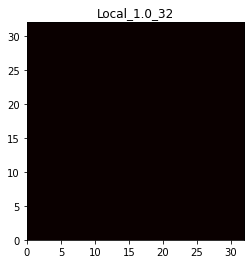

In [44]:
import random, math,os
import pylab

def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

L = 32
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}

T = 1.0
S = [random.choice([1, -1]) for k in range(N)]
nsteps = N * 1000
beta = 1.0 / T
Energy = energy(S, N, nbr)
E = []
for step in range(nsteps):
    k = random.randint(0, N - 1)
    delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S[k] *= -1
        Energy += delta_E
    E.append(Energy)
print('mean energy per spin:', sum(E) / float(len(E) * N))

filename = 'data_local_'+ str(L) + '_' + str(T) + '.txt'

def x_y(k, L):
    y = k // L
    x = k - y * L
    return x, y

conf = [[0 for x in range(L)] for y in range(L)]
for k in range(N):
    x, y = x_y(k, L)
    conf[x][y] = S[k]
    

if os.path.isfile(filename):
    f = open(filename, 'r')
    S = []
    for line in f:
        S.append(int(line))
    f.close()
    print ('Starting from file', filename)
else:
    S = [random.choice([1, -1]) for k in range(N)]
    print('Starting from a random configuration')
    
f = open(filename, 'w')
for a in S:
    f.write(str(a) + '\n')
f.close()


pylab.imshow(conf, extent=[0, L, 0, L], interpolation='nearest')
pylab.set_cmap('hot')
pylab.title('Local_'+ str(T) + '_' + str(L))
pylab.savefig('plot_A2_local_'+ str(T) + '_' + str(L)+ '.png')
pylab.show()

**A2 (continued)**

- **Comment** on what you see: **Do you observe**  (running for several times 10000*N  iterations) that the local  Metropolis algorithm ever flips between configurations of negative  overall magnetization (mostly black) and configurations of positive  overall magnetization (mostly white)?


**A2 (continued)**

- At low temperature, T=1.0 (as before), run your code for L=128 and upload a graphics file.

As mentioned we do observe a ferromagnetic state with a complete positive state or negative state, depicted as black or white stripes in the image.  

mean energy per spin: -1.3028454557061195
Starting from file data_local_128_1.0.txt


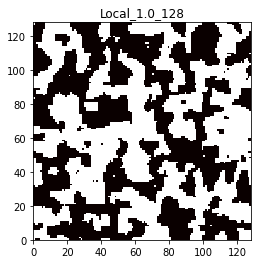

In [38]:
import random, math,os
import pylab

def energy(S, N, nbr):
    E = 0.0
    for k in range(N):
        E -=  S[k] * sum(S[nn] for nn in nbr[k])
    return 0.5 * E

L = 128
N = L * L
nbr = {i : ((i // L) * L + (i + 1) % L, (i + L) % N,
            (i // L) * L + (i - 1) % L, (i - L) % N) \
                                    for i in range(N)}

T = 1.0
S = [random.choice([1, -1]) for k in range(N)]
nsteps = N * 10
beta = 1.0 / T
Energy = energy(S, N, nbr)
E = []
for step in range(nsteps):
    k = random.randint(0, N - 1)
    delta_E = 2.0 * S[k] * sum(S[nn] for nn in nbr[k])
    if random.uniform(0.0, 1.0) < math.exp(-beta * delta_E):
        S[k] *= -1
        Energy += delta_E
    E.append(Energy)
print('mean energy per spin:', sum(E) / float(len(E) * N))

def x_y(k, L):
    y = k // L
    x = k - y * L
    return x, y

conf = [[0 for x in range(L)] for y in range(L)]
for k in range(N):
    x, y = x_y(k, L)
    conf[x][y] = S[k]
    

filename = 'data_local_'+ str(L) + '_' + str(T) + '.txt'

if os.path.isfile(filename):
    f = open(filename, 'r')
    S = []
    for line in f:
        S.append(int(line))
    f.close()
    print ('Starting from file', filename)
else:
    S = [random.choice([1, -1]) for k in range(N)]
    print('Starting from a random configuration')
    
f = open(filename, 'w')
for a in S:
    f.write(str(a) + '\n')
f.close()


pylab.imshow(conf, extent=[0, L, 0, L], interpolation='nearest')
pylab.set_cmap('hot')
pylab.title('Local_'+ str(T) + '_' + str(L))
pylab.savefig('plot_A2_local_'+ str(T) + '_' + str(L)+ '.png')
pylab.show()

**A2 (continued)**

- **Explain** what  you observe. In particular, do you observe that the system becomes  homogeneous (mostly white or mostly black) on the available time scales?

Yes, we do observe that the system becomes homogeneous (mostly white or mostly black) on the available time scales.
